In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'6.5',
    'C_time':'3',
    'L_impedance':'700',
    'number_periods':'1'
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        2275.00
Inductor Capacitance Per Length :       0.004642857142857142857142857143
Inductor Length :                       1
Inductor Total Inductance :             2275.00
Inductor Total Capacitance :            0.004642857142857142857142857143
Inductor Velocity :                     0.3076923076923076923076923077
Inductor One Way Time Delay :           3.25
Inductor Impedance :                    700

- The Capacitor -
Capacitor Inductance Per Length :       1.5
Capacitor Capacitance Per Length :      1.5
Capacitor Length :                      1
Capacitor Total Inductance :            1.5
Capacitor Total Capacitance :           1.5
Capacitor Velocity :                    0.6666666666666666666666666667
Capacitor One Way Time Delay :          1.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  367.04236822

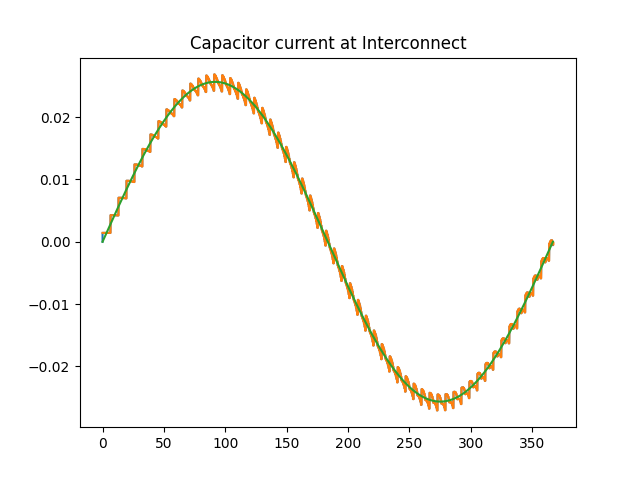

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=366.0423682286385)

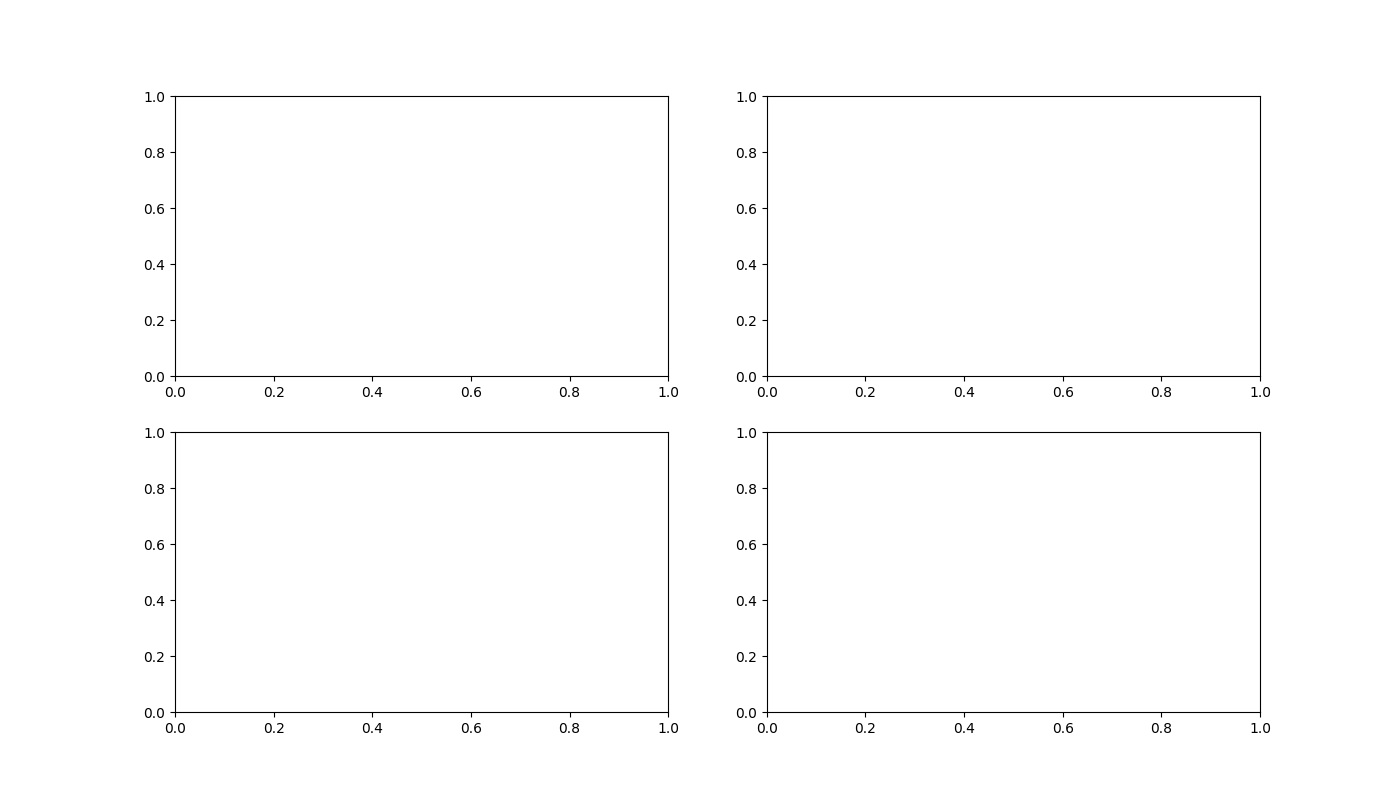

In [4]:
WP.spatial_interconnect_investigator_ui(interface)

## Fanout diagram primatives
------------------------------

### Fanout magntiude plots:

#### plot_fanout_magnitude()

Here it is shown how to use the **plot_fanout_magnitude()** funciton to display magnitude fanout plots.

We will start by visualsing the Interconnect Current before before multiplicaitve merging is considered. 


(Notice how the *title=* keyword is used to set the title, refer to the documentation for more information on the customization key-words)

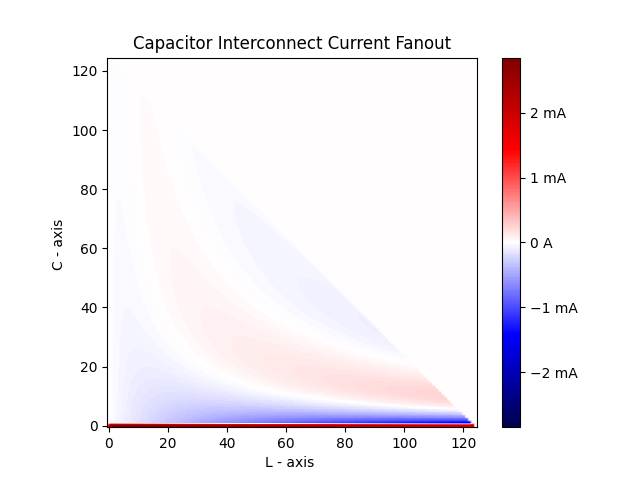

In [5]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_magnitude(interface.data_output_commutative.Current_Interconnect_Capacitor,ax_fanout_commutative, 
                         title = "Capacitor Interconnect Current Fanout")

We can see in the above interactive plot that the features in the fanout are hard to see. 

To get better contrast we will use the **custom_colour_bar_limits =** keyword. 

This customization key accepts a *tuple(max_val,min_val)* for the max an min colour range. 

Refering to the pervious plot we can see alot of features are in the 0.5 mA to -0.5 mA range:

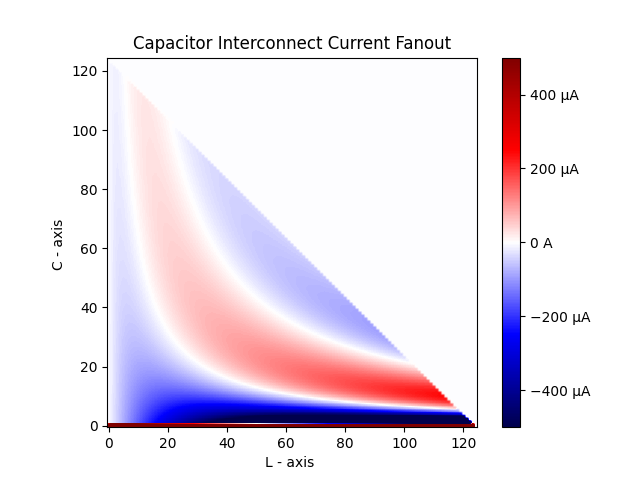

In [6]:
fig_fanout_contrast,ax_fanout_contrast = plt.subplots()
WP.plot_fanout_magnitude(interface.data_output_commutative.Current_Interconnect_Capacitor,ax_fanout_contrast, 
                         title = "Capacitor Interconnect Current Fanout",
                         custom_colour_bar_limits = (0.0005,-0.0005))

 the **plot_fanout_magnitude()** will show all Data_Output_Storage arrays, including **merged** data :

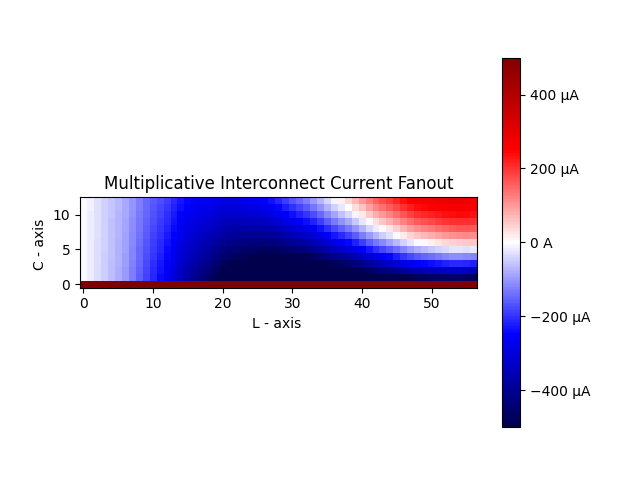

In [7]:
fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_magnitude(interface.data_output_multiplicative.Current_Interconnect_Capacitor,ax_fanout_multiplicative,
                         title = "Multiplicative Interconnect Current Fanout",
                         custom_colour_bar_limits = (0.0005,-0.0005))

In this example, the merged data of the interface is converted to lie along on the C-axis as opposed to the default L-axis. Some padding is added to make it easier to interact with the diagram.

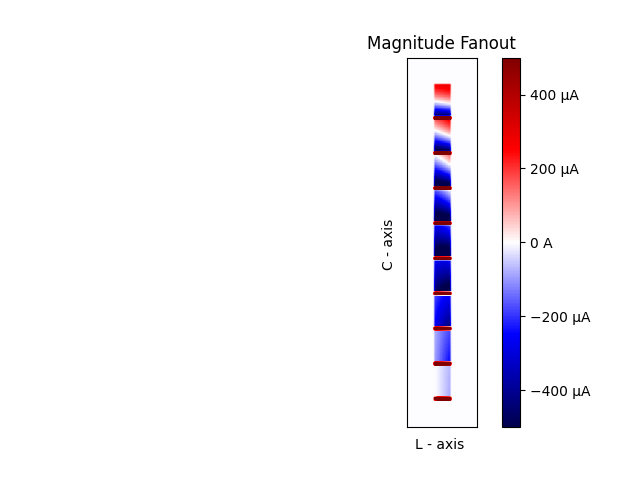

In [8]:
fig_fanout_multiplicative_alt,ax_fanout_multiplicative_alt = plt.subplots()
C_axis_merged = MC.transform_merged_array_to_C_axis(interface.data_input,interface.data_output_multiplicative.Current_Interconnect_Capacitor)
WP.plot_fanout_magnitude(C_axis_merged,ax_fanout_multiplicative_alt,custom_colour_bar_limits = (0.0005,-0.0005), padding=10,show_ticks = False)

when manually plotting magnitude fanouts in this way, it has the advantages of being customizable however the user needs to be careful.

For example, if we want to investigate the wavefront data on the fanout plot, for example the **sending inductor wavefronts**, we need to extract  either the current or voltage first before passing to the plotter.

This can easily be achieved by using the **get_sending_wavefronts_magnitudes()** method of a Data_Output_Storage class (either commutative or multiplicaitve).

Lets represent the sending inductor voltage of the data before multiplicative merging:

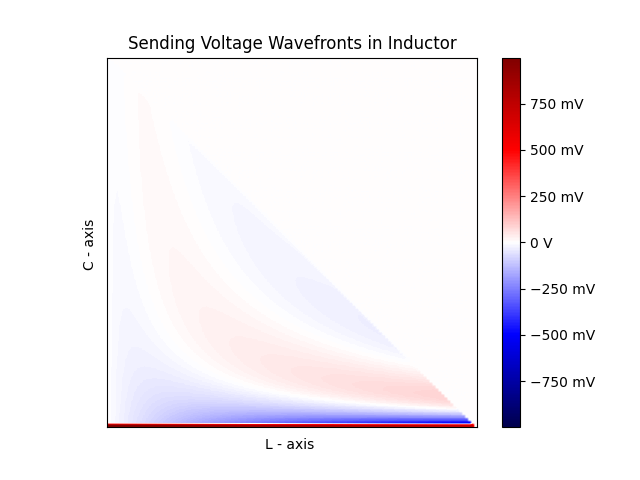

In [9]:
fig_send_ind_volt, ax_send_ind_volt = plt.subplots()

send_ind_volt_data = interface.data_output_commutative.get_sending_wavefronts_magnitudes("voltage inductor")
WP.plot_fanout_magnitude(send_ind_volt_data , ax_send_ind_volt , title="Sending Voltage Wavefronts in Inductor" , units = 'V', show_ticks=False)

as we can see that took abit of setting up to get the wavefronts in the correct form. Additionally we had to provide a title and units even though we have already provided that information when extracting the arrays. We will now show some wrapper functions that make this process easier: 

#### plot_fanout_wavefronts( ) and plot_fanout_interconnect( )

Here we will show how we can use the ***plot_fanout_wavefronts()*** wrapper function to quickly get the same plot as the previous plot. We will also compare this to the returning voltage wavefronts. Notice how we can use the **plot_fanout_magnitude()** keywords to customize the plot, in this example we use 'show_ticks'.

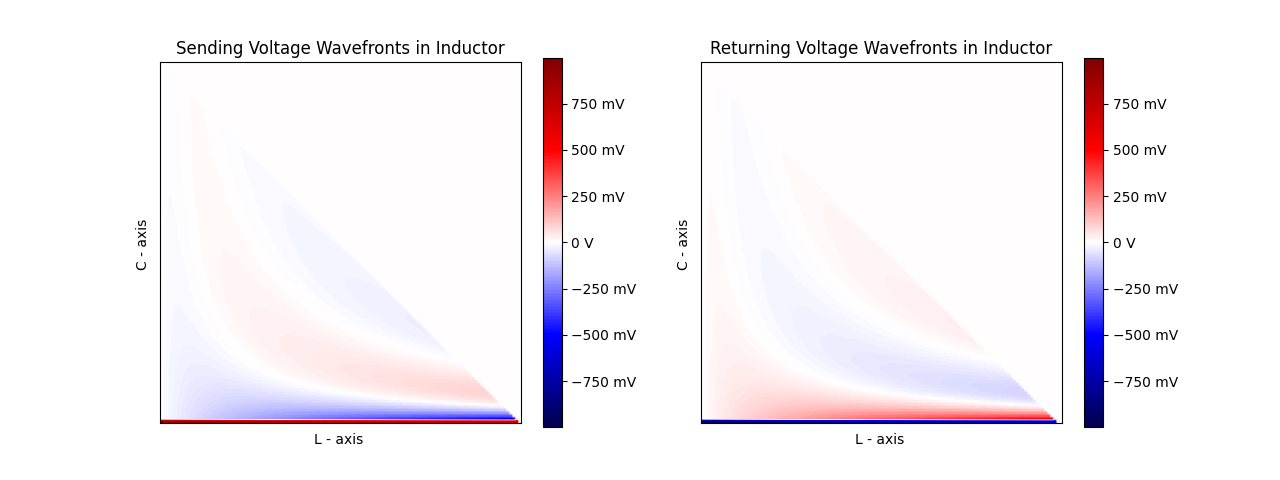

In [10]:
fig_wavefronts, ax_wavefronts = plt.subplots(1,2,figsize=(plt.rcParams["figure.figsize"][0]*2,plt.rcParams["figure.figsize"][1]))

WP.plot_fanout_wavefronts(interface.data_output_commutative,ax_wavefronts[0], "voltage inductor", True,show_ticks=False)
WP.plot_fanout_wavefronts(interface.data_output_commutative,ax_wavefronts[1], "voltage inductor", False,show_ticks=False)

we can get a similar level of automation for the interconnect magnitude fanouts using the **plot_fanout_interconnect( )** function. Here title and units formats are taken care of.

Here we will compare the interconnect voltage of the inductor with the interconnect voltage of the capacitor.

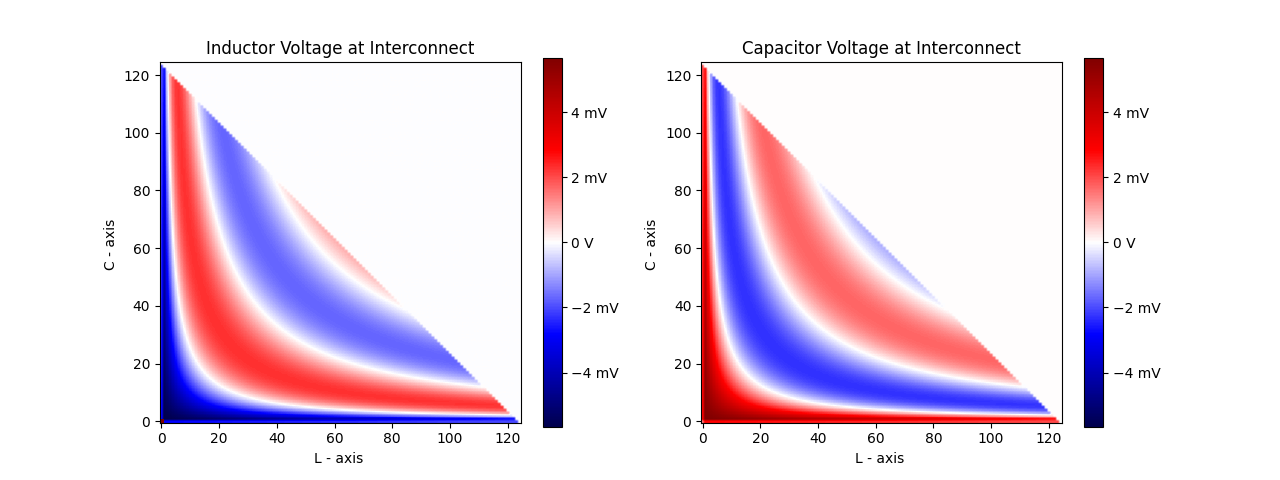

In [11]:
fig_interconnect, ax_interconnect = plt.subplots(1,2,figsize=(plt.rcParams["figure.figsize"][0]*2,plt.rcParams["figure.figsize"][1]))

WP.plot_fanout_interconnect(interface.data_output_commutative,ax_interconnect[0],'voltage inductor',contrast = True)
WP.plot_fanout_interconnect(interface.data_output_commutative,ax_interconnect[1],'voltage capacitor')

and do it for the merged case by simply passsing **interface.data_output_merged** instead of **interface.data_output_commutative**

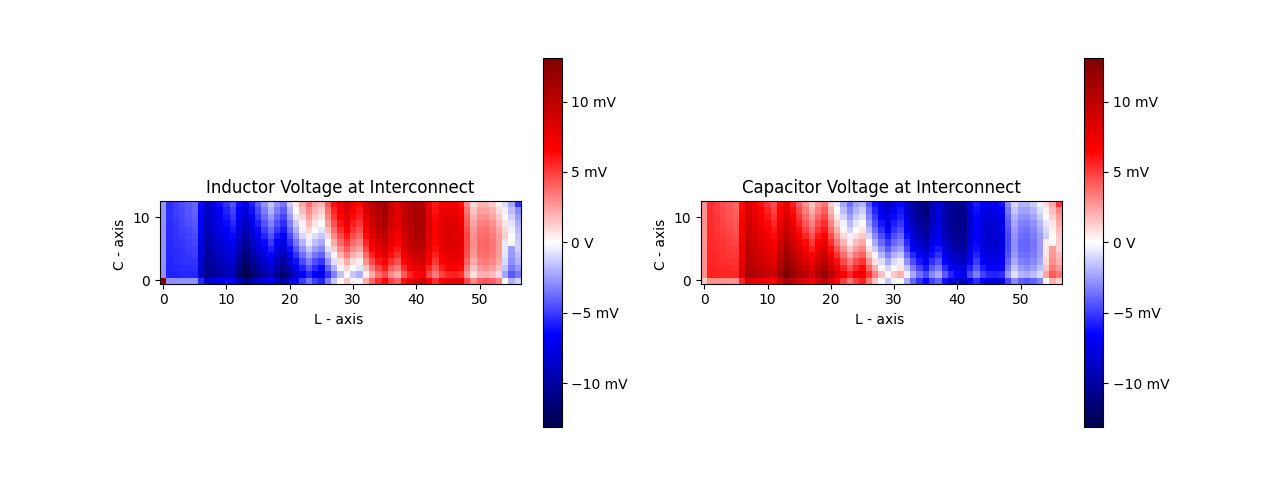

In [12]:
fig_interconnect_mul, ax_interconnect_mul = plt.subplots(1,2,figsize=(plt.rcParams["figure.figsize"][0]*2,plt.rcParams["figure.figsize"][1]))

WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_interconnect_mul[0],'voltage inductor',contrast = True)
WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_interconnect_mul[1],'voltage capacitor')

### Time Fanouts

With regards to time fanouts there is not as much functionality. 

The main function is the **plot_fanout_time()** which takes in a Time array and plots the progression in a rainbow colouring.

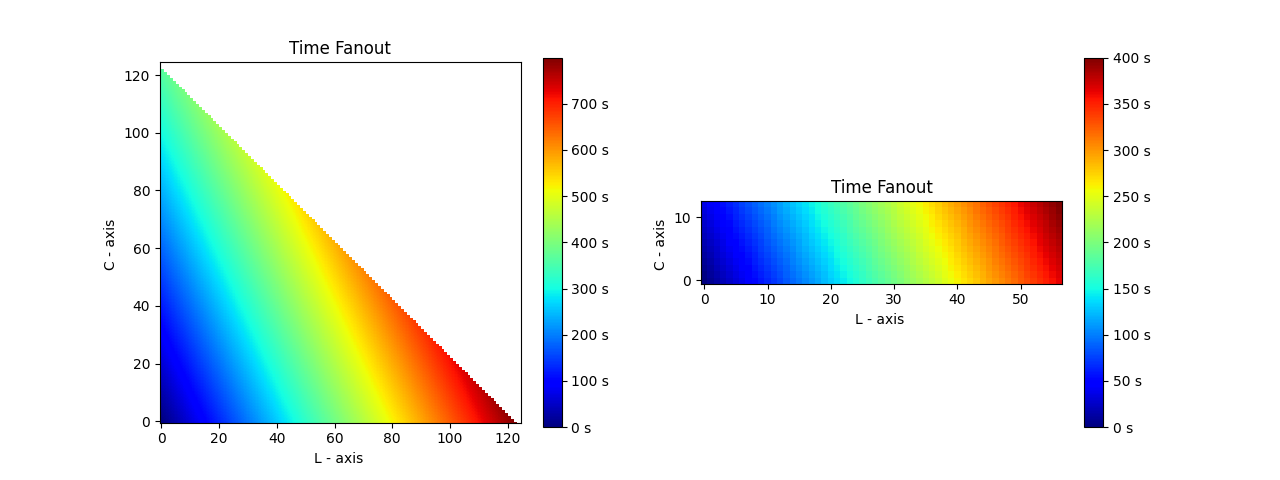

In [13]:
fig_time, ax_time = plt.subplots(1,2,figsize=(plt.rcParams["figure.figsize"][0]*2,plt.rcParams["figure.figsize"][1]))
time = interface.data_output_commutative.Time
WP.plot_fanout_time(interface.data_output_commutative.Time,ax_time[0])
WP.plot_fanout_time(interface.data_output_multiplicative.Time,ax_time[1])